# University Admission Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import utils
np.random.seed(0)

In [2]:
# importing data
data = pd.read_csv('Admission_Predict.csv', index_col = 0)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [3]:
# Schema of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB
None


In [4]:
# finding correlation between 'Chance of Admit' and all other columns
admit_chance = data.corr()['Chance of Admit']
admit_chance = pd.DataFrame(admit_chance)
admit_chance

,Chance of Admit
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
CGPA,0.873289
Research,0.553202
Chance of Admit,1.000000


In [5]:
# changing admission to category instead of numerical value
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,True
397,325,107,3,3.0,3.5,9.11,1,True
398,330,116,4,5.0,4.5,9.45,1,True


In [6]:
# splitting data into features and labels
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

In [7]:
features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [8]:
labels

Serial No.
1       True
2       True
3      False
4       True
5      False
       ...  
396     True
397     True
398     True
399    False
400     True
Name: Admitted, Length: 400, dtype: bool

## Training Decision Tree Classifier

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(features, labels)

DecisionTreeClassifier()

In [11]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [12]:
dt.score(features, labels)

1.0

 Observation: score = 1 indicates that the model overfitted,
          also notice the tree below

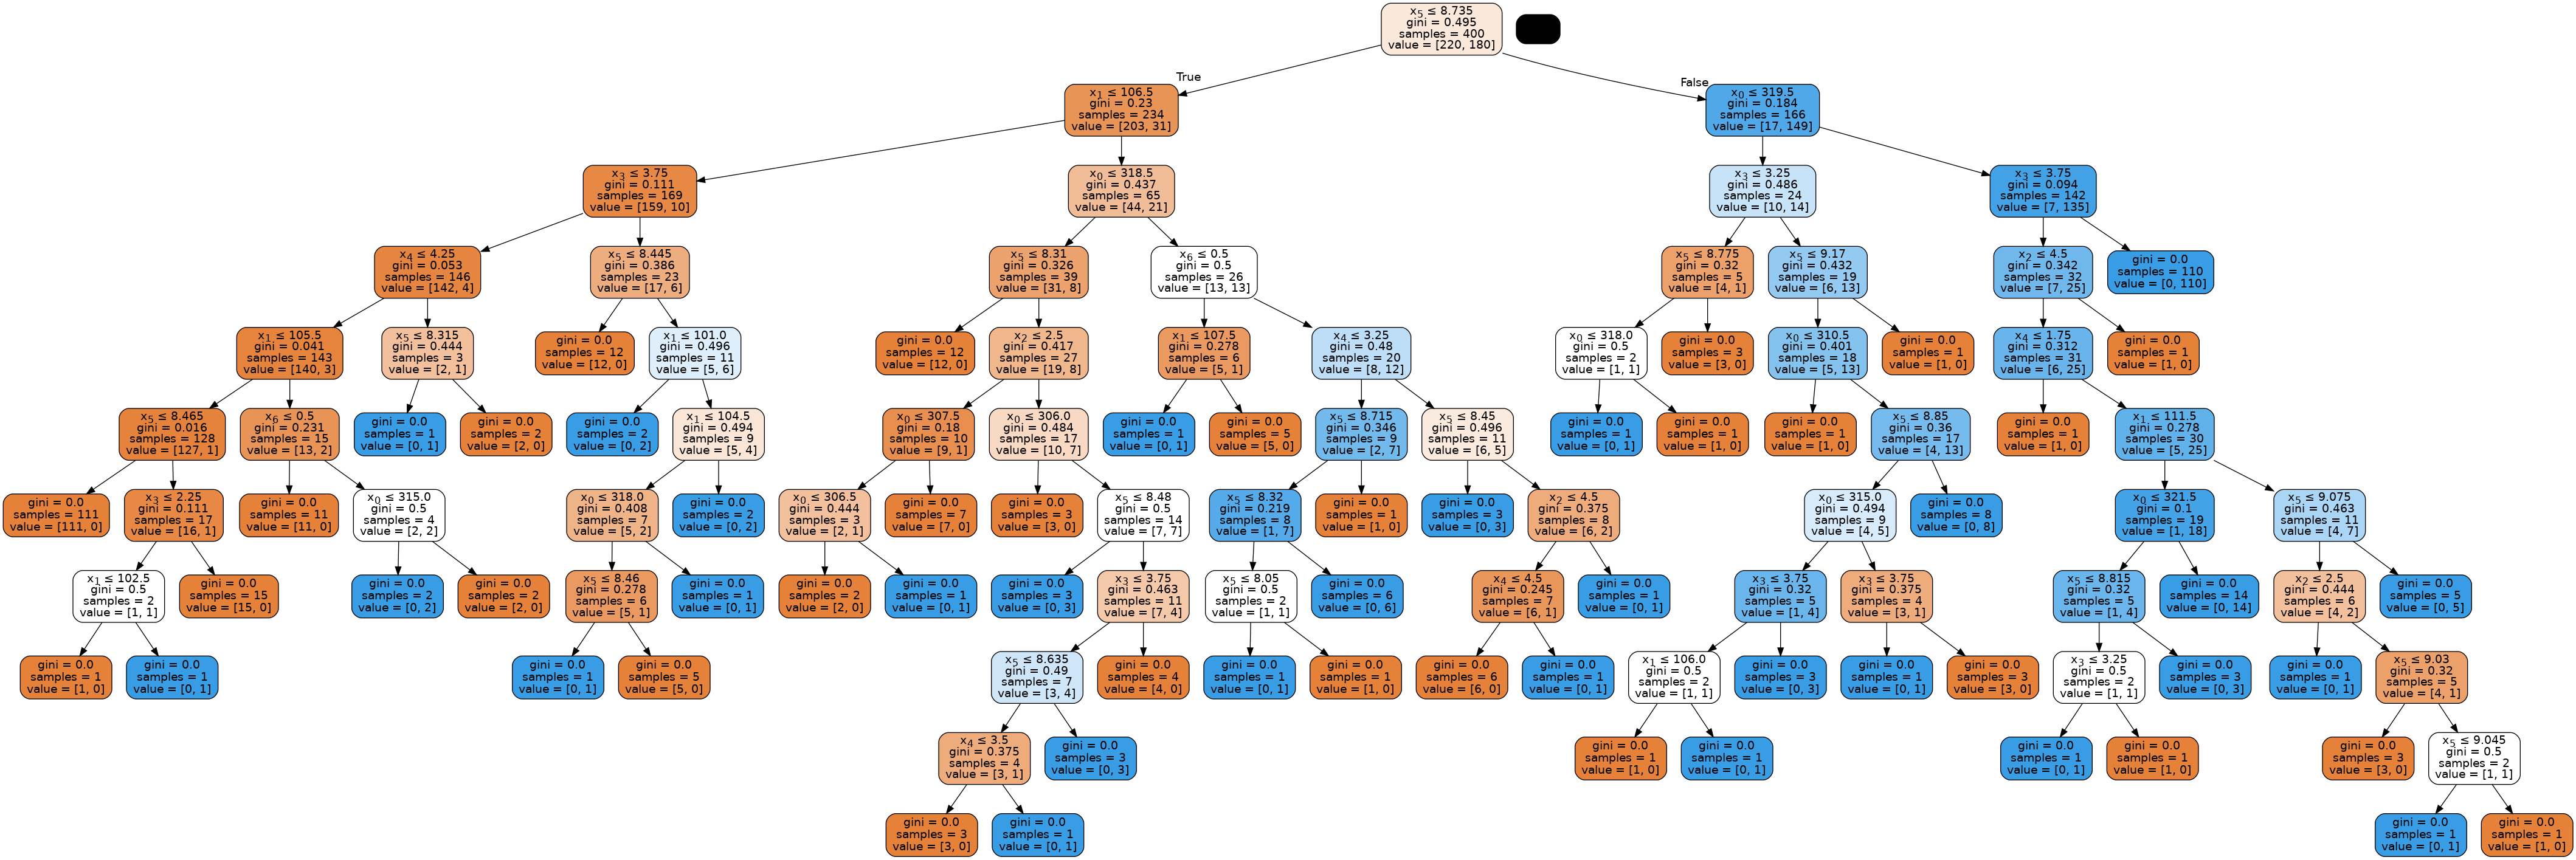

In [13]:
utils.display_tree(dt)

Observe how the tree overfitted to the training data, lets modify the hyperparameters

In [14]:
dt_smaller_gini = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=10, min_samples_split=10)
dt_smaller_gini.fit(features, labels)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [15]:
# DTC by default uses Gini Impurity Index as default criterion, we will try entropy as well
dt_smaller_entropy = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth = 3, 
    min_samples_leaf=10, 
    min_samples_split=10)

dt_smaller_entropy.fit(features, labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=10)

In [16]:
print('Gini: ', 
      dt_smaller_gini.score(features, labels), 
      ' vs Entropy: ', 
      dt_smaller_entropy.score(features, labels)
     )

Gini:  0.885  vs Entropy:  0.88


Observation: gini is achieving a better score against entropy

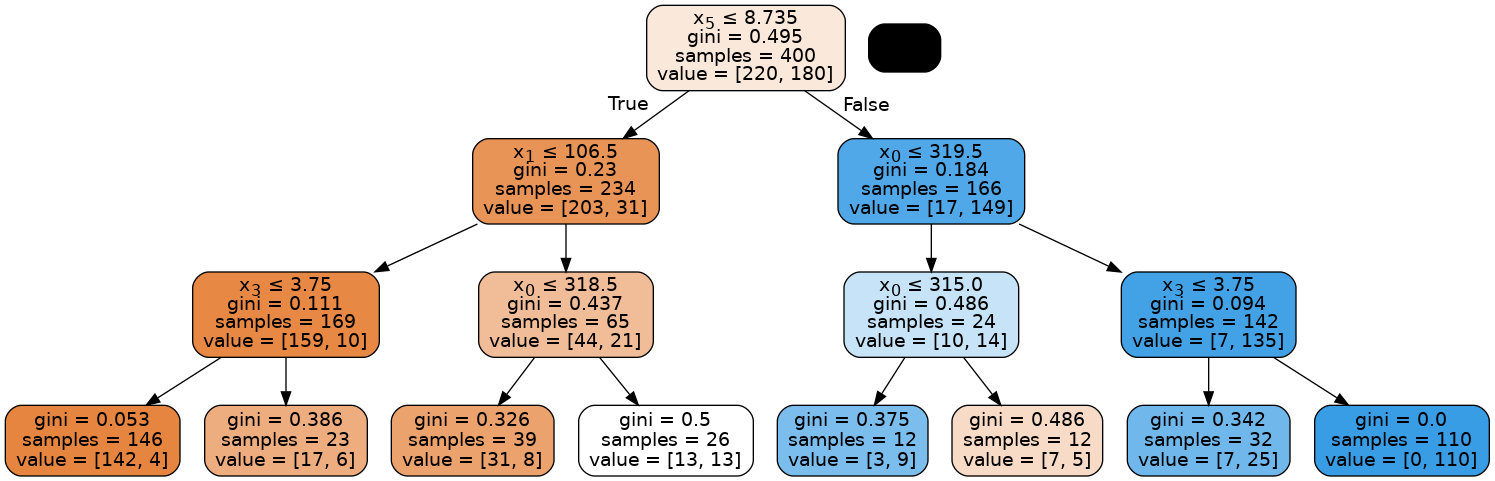

In [17]:
utils.display_tree(dt_smaller_gini)

In [18]:
                        # x1 , x2 ,x3, x4,  x5 , x6 ,x7
dt_smaller_gini.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]])

/home/ahmed/.pyenv/versions/3.8.18/envs/myenv38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [19]:
                        #x1 , x2 ,x3, x4 , x5 ,x6 ,x7
dt_smaller_gini.predict([[320,110 ,3 ,4.0 ,3.5 ,8.0, 0 ]])

/home/ahmed/.pyenv/versions/3.8.18/envs/myenv38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

In [20]:
# Let's try to classify by picking only two features so we are able to plot them
exams = data[['GRE Score', 'TOEFL Score']]
exams

,GRE Score,TOEFL Score
Serial No.,,
1,337,118
2,324,107
3,316,104
4,322,110
5,314,103
...,...,...
396,324,110
397,325,107
398,330,116


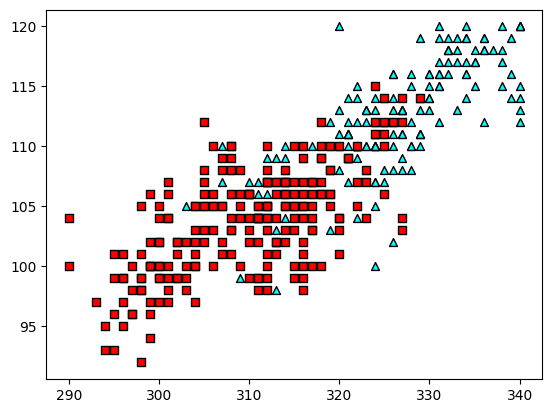

In [21]:
utils.plot_points(exams, labels, size_of_points=32)

In [22]:
dt_exams = DecisionTreeClassifier(max_depth=2)
dt_exams.fit(exams, labels)

DecisionTreeClassifier(max_depth=2)

/home/ahmed/.pyenv/versions/3.8.18/envs/myenv38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


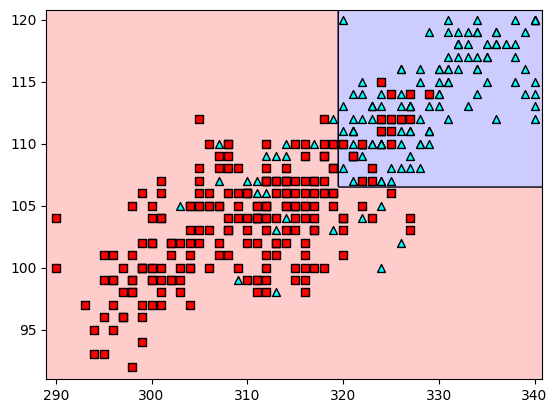

Score:  0.8625


In [23]:
utils.plot_model(exams, labels, dt_exams, size_of_points=32)
print('Score: ', dt_exams.score(exams, labels))

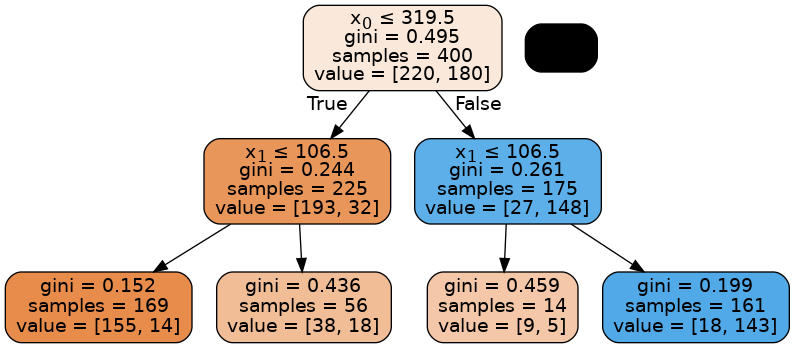

In [24]:
utils.display_tree(dt_exams)

## Trying fitting a tree of depth 1 (underfitting)

/home/ahmed/.pyenv/versions/3.8.18/envs/myenv38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


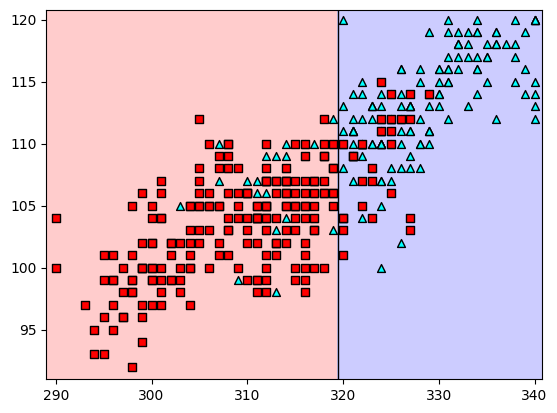

Score:  0.8525


In [25]:
simpler_dt_exams = DecisionTreeClassifier(max_depth=1)
simpler_dt_exams.fit(exams, labels)
utils.plot_model(exams, labels, simpler_dt_exams, size_of_points=32)
print('Score: ', simpler_dt_exams.score(exams, labels))

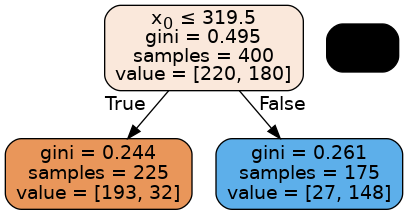

In [26]:
utils.display_tree(simpler_dt_exams)

### Fitting a tree of unbounded depth(overfitting)

/home/ahmed/.pyenv/versions/3.8.18/envs/myenv38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


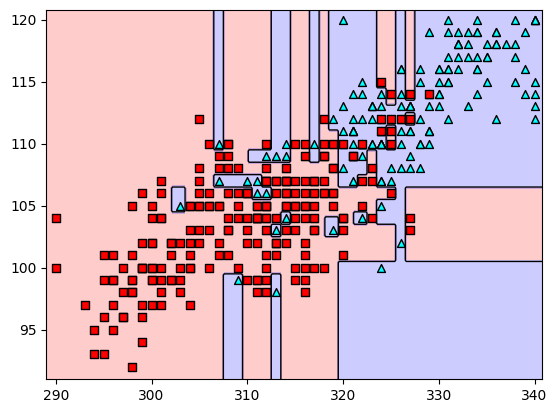

Score:  0.93


In [27]:
overfitted_dt_exams = DecisionTreeClassifier()
overfitted_dt_exams.fit(exams, labels)
utils.plot_model(exams, labels, overfitted_dt_exams, size_of_points=32)
print('Score: ', overfitted_dt_exams.score(exams, labels))

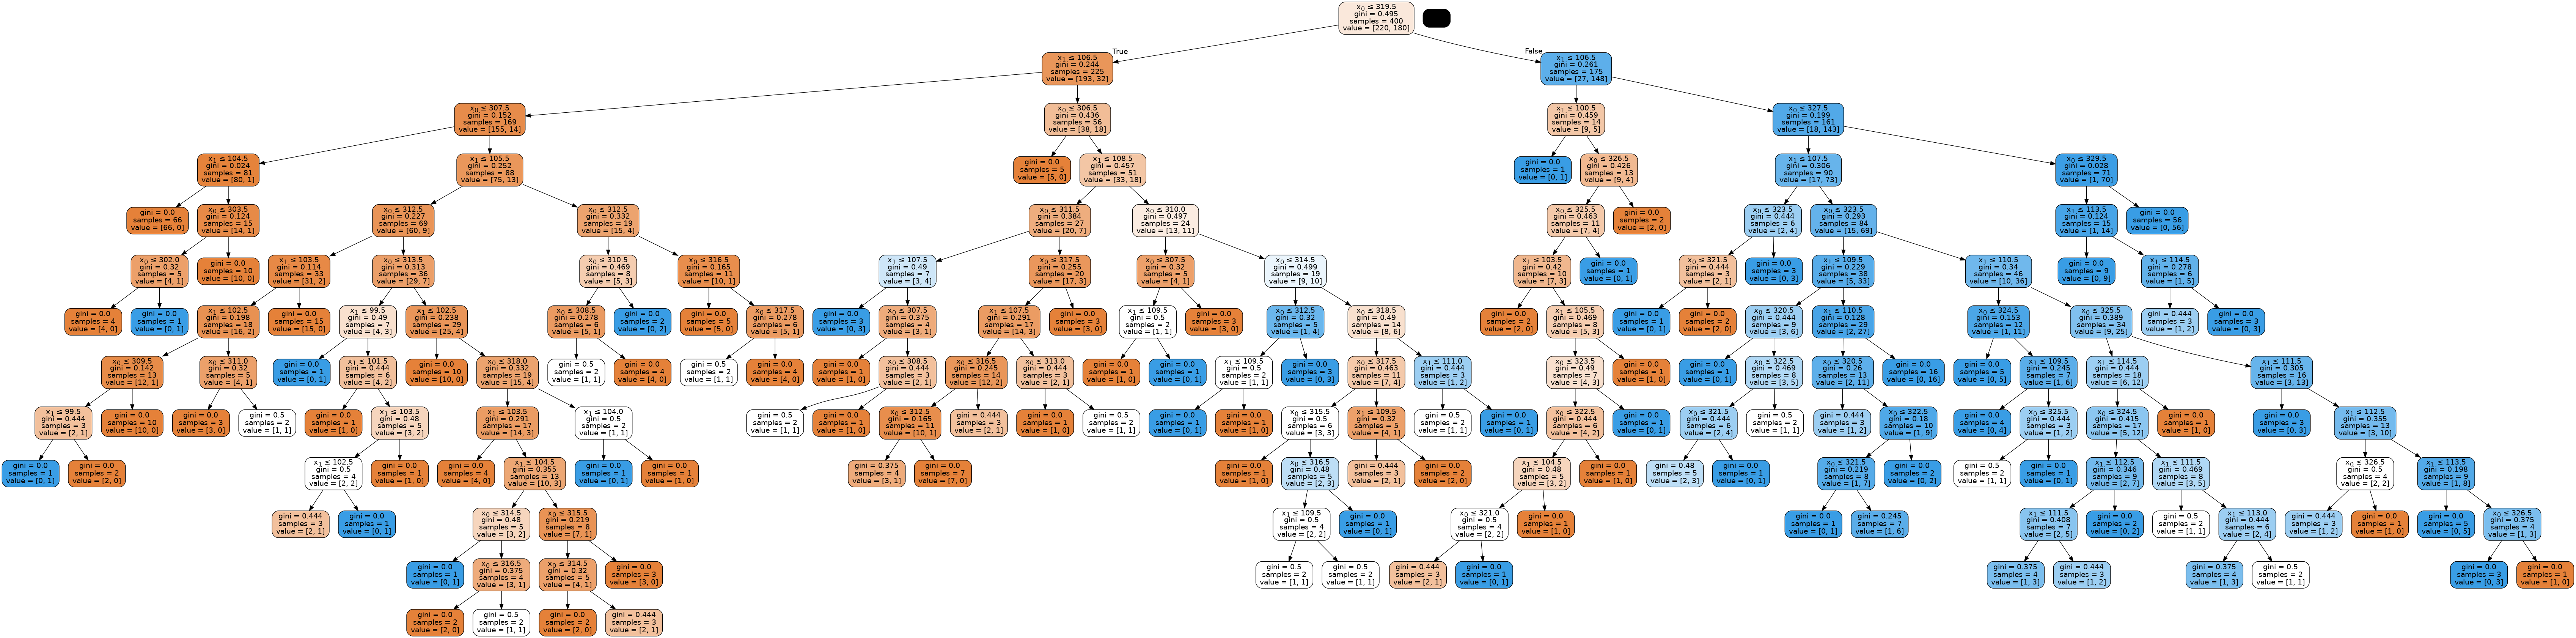

In [28]:
utils.display_tree(overfitted_dt_exams)